# Сверточная нейронная сеть

### Введение

Сверточные нейронные сети (convolutional neural networks, CNN) предназначены для работы со входами, имеющими сетчатую           структуру и характеризующимися сильными пространственными зависимостями в локальных областях сетки. 
Наиболее показательным примером данных, имеющих такую структуру, является двухмерное изображение.

In [1]:
import keras

### Архитектура сети

В CNN состояния в каждом слое выстраиваются в соответсвтии с сетчатой пространственной структурой. Эти пространственные         отношения наследуются от одного слоя к другому, поскольку значение каждого признака базируется
на небольшой пространственной области предыдущего слоя. Очень важно поддерживать эти пространственные отношения между           ячейками сетки, поскольку от них критически зависят операция свертки и преобразование к следующему
слою. 

Каждый слой в CNN представляет собой трехмерную сетчатую структуру, характеризующуюся высотой, шириной и глубиной
(не путать с глубиной нейронной сети). В контексте распознавания образов глубина входного слоя может означать rgb или 
2rgba канал, а в скрытых слоях глубина - количество карт признаков. Как правило, используются три слоя: фильтр, 
пуллинга и ReLU.

$ReLU$ - функция активации вида $ReLU(x) = \max{\{0, x\}}$

### Фильтр и свертка
Фильтр - трехмерный блок, ширина и высота которого намного меньше слоя, с которым он взаимодействовать. Глубина же совпадает с глубиной его слоя. От количества фильтров в текущем слое завсит глубина следующего слоя CNN. Фильтр действует на слой как "скалярное произведение матриц". Фильтр может уменьшать ширину и высоту следующих слоев, а может и сохранять их. Фильтры нужны для нахождения пространственных признаков. Применение фильтров и есть операция свертки.

Представим параметры р-го фильтра в q-м слое в виде 3-мерного тензора
$W^{(p, q)} = [w^{(p, q)}_{ijk}]$. Индексы i, j, k задают позиции по высоте, ширине и глубине
фильтра. Карты признаков в q-м слое представим в виде 3-мерного тензора
$H^{(p, q)} = [h^{(p, q)}_{ijk}]$. Если q = 1, то частный случай, соответствующий обозначению
$H^{(1)}$, представляет входной слой (который не скрыт). Тогда операция свертки из
q-го слоя в (q + 1)-й слой с уменьшением ширины и высоты карт признаков определяется следующим образом:
$$h^{(q+1)}_{ijp} = \sum_{r=1}^{F_q}\sum_{s=1}^{F_q}\sum_{k=1}^{d_q} w^{(p, q)}_{rsk} h^{(q)}_{i + r - 1, j + s - 1, k}$$
$$\forall i \in \{1,..., L_q - F_q + 1\}$$
$$\forall j \in \{1,..., B_q - F_q + 1\}$$
$$\forall p \in \{1,...,d_q\}~~~~~~~~~~~~~~~~$$

$F_q \text{ - ширина и высота q-го фильтра} \\ L_q, B_q \text{ - ширина и высота q-го слоя} \\ d_q \text{ - глубина q-го слоя и фильтра} $

<div>
    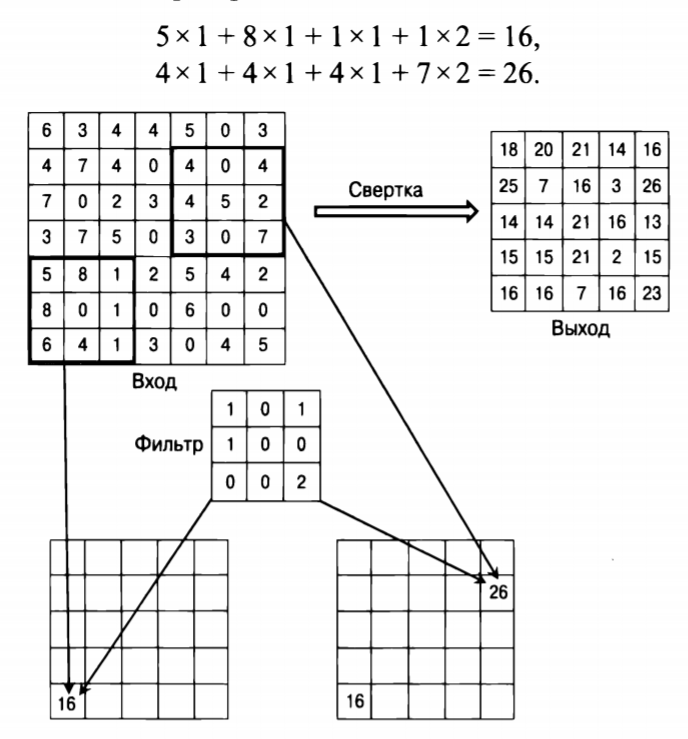
</div>

Одним из свойств свертки является ее эквивариантность по отношению к
переносам. Иными словами, если мы сместим пиксельные значения в любом направлении на одну единицу, а затем применим
операцию свертки, то значения соответствующих признаков сместятся вместе со входными значениями. Это обусловлено тем, что параметры фильтра
разделяются всей сверткой. Причиной разделения параметров всей сверткой
является то, что любая отдельно взятая форма, находящаяся в любой части изображения, должна обрабатываться одинаковым образом, независимо от ее конкретного пространственного расположения.

### Пуллинг
Пулинг - совершенно другая операция. Пулинг работает на небольших областях сетки размером $P_q \times P_q$ 
в каждом слое и создает другой слой с той же глубинюй (в отличие от фильтров). Для каждой из квадратных областей размером $P_q \times P_q$ в каждой из $d_q$ карт признаков возвращается максимальное из значений.
Этот подход носит название пулинг по максимальному значению (max-pooling).
Если используется шаг, равный 1, то в результате будет создан новый слой размером $(L_q - P_q + 1) \times (B_q - P_q + 1) \times d_q$. Однако в случае пулинга чаще встречается шаг $S_q > 1$. В подобных случаях длина нового слоя будет составлять $(L_q - P_q)/S_{q+1}$, а ширина - $(B_q - P_q) / S_{q+1}$· Как следствие, пулинг резко уменьшает пространственные размеры каждой карты активации.

### Обучение
Принцип обучения совпадает с обычной полносвязной сетью. Мы должны посчитать градиент функции ошибки и распространить его по всей сети. Так как последние два слоя обычно полносвязные, распространение и настройка весов происходит также, как и в обычной полносвязной сети. 
$\\\\$
Частная производная функции потерь по подвыборочному состоянию распространяется обратно к элементу с максимальным значением.  Всем остальным ячейкам сетки назначается нулевое значение
$\\\\$
В сверточных нейронных сетях операция обратного распространения ошибки выполняется путем умножения вектора градиентов в слое (q + 1) на транспонированную матрицу весов связей между слоями q и (q + 1) для получения вектора градиентов в слое q. В сверточных нейронных сетях производные, распространенные в обратном направлении, связываются также с пространственными позициями в слоях.
$\\\\$
Обучение фильтров можно рассмотреть как матричное умножение уплощенного слоя ошибок (вектор) и разряженной матрицы фильтра.
<div>
    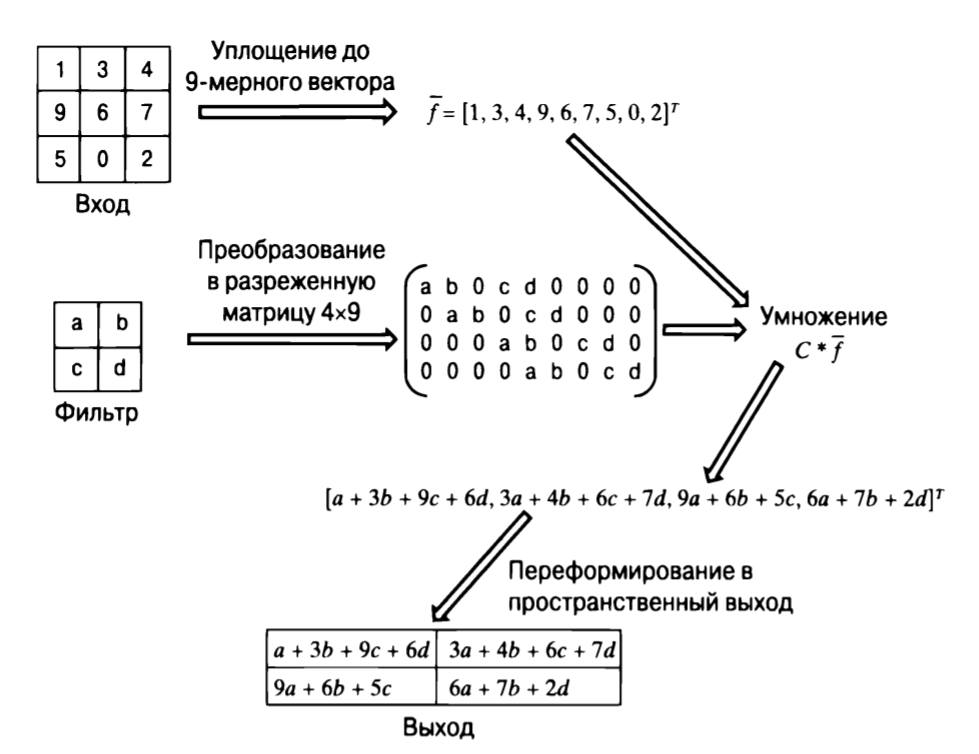
</div>

Данное рассмотрение относится к упрощенному случаю, когда глубина равна 1. В тех случаях, когда глубина превышает 1, тот же подход применяется к каждому из 2-мерных срезов, и результаты суммируются. Иными словами, мы агрегируем величину $\sum_p C_p \overline{f}_p $ по различным индексам срезов р, а затем переформируем результаты в 2-мерную матрицу.

### LeNet
Одна из первых сверточных нейросетей, в ней всего-лишь 2 слоя свертки и пуллинга.

In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [12]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL

        model.add(Conv2D(50, kernel_size=5, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))

        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [23]:
# hyper parameters
NB_EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28
NB_CLASSES = 10
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [16]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [24]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
Y_predicted = model.predict(X_test, verbose=VERBOSE)

Epoch 1/20
375/375 [==============================] - 23s 62ms/step - loss: 0.1836 - accuracy: 0.9449 - val_loss: 0.0565 - val_accuracy: 0.9812
Epoch 2/20
375/375 [==============================] - 23s 62ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 3/20
375/375 [==============================] - 23s 62ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0377 - val_accuracy: 0.9884
Epoch 4/20
375/375 [==============================] - 23s 62ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0385 - val_accuracy: 0.9889
Epoch 5/20
375/375 [==============================] - 23s 62ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 6/20
375/375 [==============================] - 23s 63ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0346 - val_accuracy: 0.9896
Epoch 7/20
375/375 [==============================] - 24s 65ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0392 - val_accuracy:

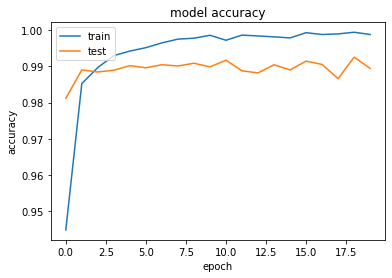

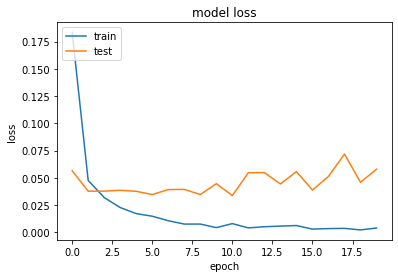

In [25]:
# accuracy graphic
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# error graphic
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
!pip install opencv-python


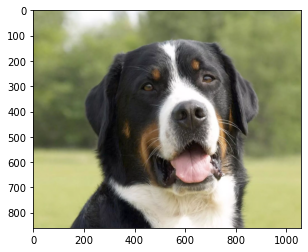

In [17]:
import cv2
import matplotlib.image as mpimg

img_path = './img/dog.png'

image = mpimg.imread(img_path)
plt.imshow(image)


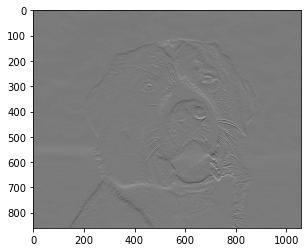

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

sobel = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])
filtered_image = cv2.filter2D(gray, -1, sobel)
plt.imshow(filtered_image, cmap='gray')